<div style='font-size:20pt'>TextBlob</div>
<b>Objective: does textblob provide good results at sentiment anaylsis ?<br></b>
 -> Apply textblob on texts and compare results to target

# Imports

In [1]:
import pandas as pd
import numpy as np
from NLPprojects.utils import text_cleaner
from NLPprojects.textblob_utils import add_subjectivity_and_polarity, add_textblob_analysis, plot_wordcloud
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data

In [2]:
df_train = pd.read_csv("../raw_data/Corona_NLP_train.csv")
df_test = pd.read_csv("../raw_data/Corona_NLP_test.csv")

# Clean data

## Train

In [3]:
df_train["cleanTweet"] = df_train["OriginalTweet"]
cleaner = text_cleaner(df=df_train, label="cleanTweet")
cleaner.lowerize()
cleaner.remove_emails()
cleaner.remove_mentions()
cleaner.remove_hyperlinks()
cleaner.remove_hashtags()
cleaner.remove_html_tags()
cleaner.remove_numbers()
cleaner.encode_unknown()
cleaner.clean_punctuation_no_accent()
cleaner.clean_stopwords()
cleaner.more_cleaning()
cleaner.lemmatize()
cleaner.add_vocabulary_richness()
#
df_train = cleaner.df.copy()
df_train.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleanTweet,vocabulary_richness
22542,26373,71325,NaN,25-03-2020,Didn't expect to go to a supermarket on my one...,Neutral,expect supermarket one trip today smell someon...,1.000000
4738,8546,53498,Austin,18-03-2020,@realDonaldTrump Time to stop telling us what ...,Positive,time stop tell stand line grocery store proba...,0.937500
18770,22599,67551,NaN,23-03-2020,Me yesterday when I went to Walmart #COVID?19 ...,Neutral,yesterday go walmart,1.000000
5931,9740,54692,NaN,19-03-2020,During the the novel outbreak supermarket owne...,Extremely Positive,novel outbreak supermarket owner take creative...,1.000000
11666,15483,60435,"Cornwall & Devon, UK",20-03-2020,Forget filling your boot at the supermarket. S...,Extremely Positive,forget fill boot supermarket support local bus...,0.941176


## Test

In [4]:
df_test["cleanTweet"] = df_test["OriginalTweet"]
cleaner = text_cleaner(df=df_test, label="cleanTweet")
cleaner.lowerize()
cleaner.remove_emails()
cleaner.remove_mentions()
cleaner.remove_hyperlinks()
cleaner.remove_hashtags()
cleaner.remove_html_tags()
cleaner.remove_numbers()
cleaner.encode_unknown()
cleaner.clean_punctuation_no_accent()
cleaner.clean_stopwords()
cleaner.more_cleaning()
cleaner.lemmatize()
cleaner.add_vocabulary_richness()
#
df_test = cleaner.df.copy()
df_test.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleanTweet,vocabulary_richness
327,328,45280,"Maine, USA",12-03-2020,Its so weird being in a state where #Covid_19...,Positive,weird state hasnt hit yet life still felt pret...,0.937500
3040,3042,47994,"New York, NY",15-03-2020,@tracybeanz Feels like were willing to destro...,Negative,feel like will destroy success engine nation ...,1.000000
1746,1747,46699,"Sabah, Borneo",13-03-2020,Hmm i think i need to convince my parents to b...,Positive,hmm think need convince parent buy lot food su...,0.764706
559,560,45512,"London, England",12-03-2020,&gt;&gt; one more thing about the #Covid_19 if...,Neutral,one thing go stock buy hoe donate local food ...,1.000000
824,825,45777,Earth,12-03-2020,PM will be addressing the nation at 8pm later....,Positive,address nation late panic though wipe superma...,1.000000


# Add Subjectivity and Polarity columns to the data frame

In [5]:
df_train = add_subjectivity_and_polarity(df_train, label="cleanTweet")
df_train.sample(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleanTweet,vocabulary_richness,subjectivity,polarity
966,4770,49722,Tilburg The Netherlands,17-03-2020,Lockdown..our mind matter the most! https://t....,Neutral,lockdown mind matter,1.000000,0.000000,0.000000
39038,42893,87845,Northwest England,12-04-2020,"@Sarah_Cundy Be careful, stay safe, wash hands...",Positive,careful stay safe wash hand amp even hair cha...,0.923077,0.409091,0.112121
34468,38314,83266,"Albany, New York",08-04-2020,Calling it now:\r\r\nCornavirus leads to a mas...,Positive,call cornavirus lead mass reduction cash trans...,1.000000,0.800000,0.350000


In [6]:
df_test = add_subjectivity_and_polarity(df_test, label="cleanTweet")
df_test.sample(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleanTweet,vocabulary_richness,subjectivity,polarity
3145,3148,48100,"Calgary, AB, Canada",15-03-2020,"Everyone needs to calm down, turn off the news...",Negative,everyone need calm turn news fearmongers liste...,1.000000,0.4625,-0.0500
2254,2255,47207,"London, England",14-03-2020,"I didn't really need it, just wanted to follow...",Neutral,really need want follow,1.000000,0.2000,0.2000
48,49,45001,United States,09-03-2020,Global stocks plummeted today due to fear surr...,Extremely Negative,global stock plummet today due fear surround f...,0.964286,0.3950,-0.1725


# Analysis

## Word cloud

### Train

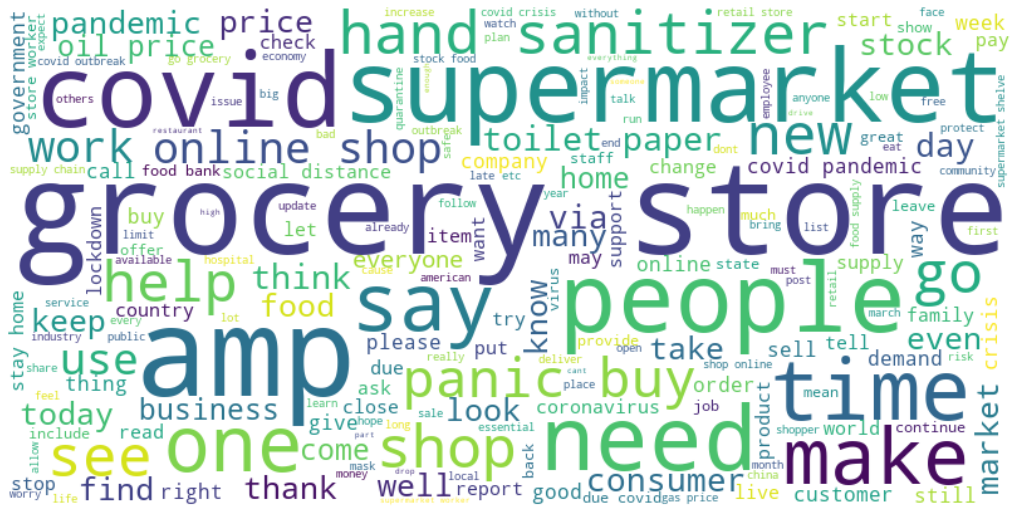

In [7]:
plot_wordcloud(df_train, label="cleanTweet")

### Test

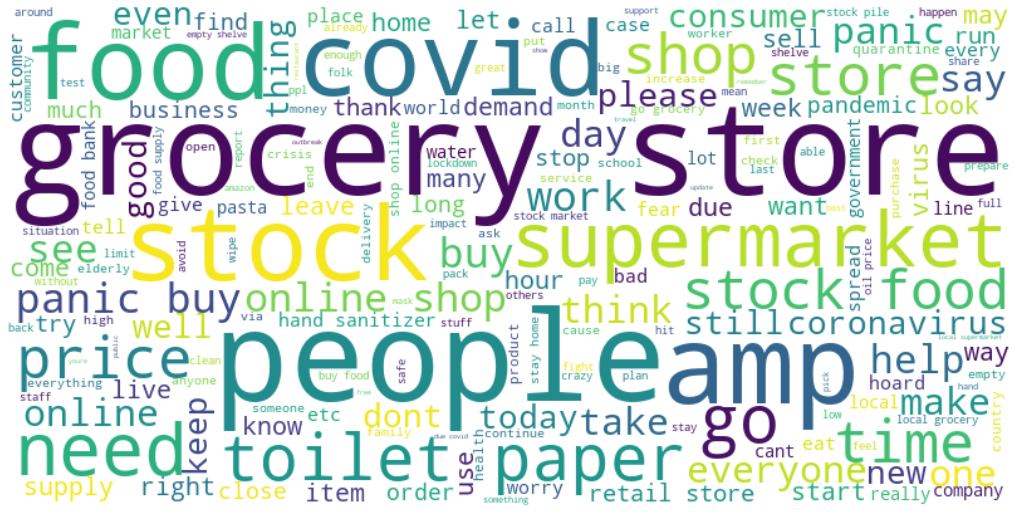

In [8]:
plot_wordcloud(df_test, label="cleanTweet")

## Sentiment calculator

### Train

In [9]:
df_train = add_textblob_analysis(df_train)
df_train.sample(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleanTweet,vocabulary_richness,subjectivity,polarity,textblob_analysis
19575,23404,68356,Location,24-03-2020,Prices of vegetables triple in Hyderabad since...,Neutral,price vegetable triple hyderabad since lockdown,1.0,0.000000,0.00,Neutral
33598,37444,82396,NaN,08-04-2020,All Together are offering free and confidentia...,Extremely Positive,together offer free confidential advice suppor...,1.0,0.800000,0.40,Positive
4146,7953,52905,"Baton Rouge, LA",18-03-2020,Chain restaurants &amp; large retailers: If yo...,Extremely Negative,chain restaurant amp large retailer youre supp...,1.0,0.482143,0.25,Positive


In [10]:
display(df_train.shape)

(41099, 11)

### Test

In [11]:
df_test = add_textblob_analysis(df_test)
df_test.sample(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleanTweet,vocabulary_richness,subjectivity,polarity,textblob_analysis
193,194,45146,New York City,11-03-2020,Its fucked when you can come up with a solid ...,Extremely Positive,fuck come solid plan store combat well high up...,0.962963,0.581667,0.089167,Positive
3180,3183,48135,"Oakville, Ontario",15-03-2020,one wonders - are our grocery store shelves em...,Negative,one wonder grocery store shelve empty zombie s...,1.000000,0.500000,-0.100000,Negative
2557,2558,47510,"San Francisco, CA",14-03-2020,"In reading a German friend's COVID-19 update, ...",Extremely Positive,read german friend covid update run new word i...,0.892857,0.460690,-0.008460,Negative


In [12]:
display(df_test.shape)

(3795, 11)

## Converting 5 sentiment classes on original dataset to 3 sentiment classes

### Train

In [13]:
df_train["Sentiment_custom"] = df_train["Sentiment"].apply(lambda x: "Negative" if x.find("Negative")>=0 else ("Positive" if x.find("Positive")>=0 else "Neutral"))
df_train.sample(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleanTweet,vocabulary_richness,subjectivity,polarity,textblob_analysis,Sentiment_custom
21632,25463,70415,"Atlanta, GA",25-03-2020,"No matter how bad it gets, no one wants dude ...",Extremely Negative,matter bad get one want dude wipe people use n...,1.000000,0.666667,-0.700000,Negative,Negative
3312,7118,52070,London,18-03-2020,Really starting to see the impact of Covid-19 ...,Negative,really start see impact covid home town empty ...,0.800000,0.483333,-0.016667,Negative,Negative
27511,31343,76295,NaN,03-04-2020,1986=only seasonal roadmap close to 2020 #oilp...,Negative,seasonal roadmap close rout skirmish amp even...,0.956522,0.400000,0.000000,Neutral,Negative


### Test

In [15]:
df_test["Sentiment_custom"] = df_test["Sentiment"].apply(lambda x: "Negative" if x.find("Negative")>=0 else ("Positive" if x.find("Positive")>=0 else "Neutral"))
df_test.sample(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleanTweet,vocabulary_richness,subjectivity,polarity,textblob_analysis,Sentiment_custom
1171,1172,46124,"GTA, Ontario",13-03-2020,This #OilPriceWar + #Covid_19 makes for some k...,Neutral,make kookoobananas gas price,1.000000,0.000000,0.000000,Neutral,Neutral
789,790,45742,World Traveler,12-03-2020,I just checked my surgical mask stash:\r\r\nI ...,Negative,check surgical mask stash ply surgical mask se...,0.809524,0.547500,0.177500,Positive,Negative
1544,1545,46497,"Kiruhura, Uganda",13-03-2020,"With the current World crisis around Covid-19,...",Negative,current world crisis around covid affect socia...,0.814815,0.489583,0.029167,Positive,Negative


## Performance

### Train

In [16]:
TP = 0
TN = 0
FP = 0
FN = 0
#
for val_true, val_calc in zip(list(df_train["Sentiment_custom"]), list(df_train["textblob_analysis"])):
    if val_calc == "Positive":
        if val_true == "Positive":
            TP += 1
        elif val_true == "Negative":
            FP += 1
    elif val_calc == "Negative":
        if val_true == "Positive":
            FN += 1
        elif val_true == "Negative":
            TN += 1        

In [17]:
display("True Positive: " + str(TP))
display("True Negative: " + str(TN))
display("False Positive: " + str(FP))
display("False Negative: " + str(FN))

'True Positive: 10916'

'True Negative: 6102'

'False Positive: 5012'

'False Negative: 2913'

In [18]:
display("Accuracy of this TextBlob analysis: " +  str(round((TP + TN)*100/(TP + TN + FP + FN), 1)) + "%")
display("Precision of this TextBlob analysis: " +  str(round((TP)*100/(TP + FP), 1)) + "%")
display("Recall (sensitivity) of this TextBlob analysis: " +  str(round((TP)*100/(TP + FN), 1)) + "%")

'Accuracy of this TextBlob analysis: 68.2%'

'Precision of this TextBlob analysis: 68.5%'

'Recall (sensitivity) of this TextBlob analysis: 78.9%'

### Test

In [19]:
TP_test = 0
TN_test = 0
FP_test = 0
FN_test = 0
#
for val_true, val_calc in zip(list(df_test["Sentiment_custom"]), list(df_test["textblob_analysis"])):
    if val_calc == "Positive":
        if val_true == "Positive":
            TP_test += 1
        elif val_true == "Negative":
            FP_test += 1
    elif val_calc == "Negative":
        if val_true == "Positive":
            FN_test += 1
        elif val_true == "Negative":
            TN_test += 1 

In [20]:
display("True Positive: " + str(TP_test))
display("True Negative: " + str(TN_test))
display("False Positive: " + str(FP_test))
display("False Negative: " + str(FN_test))

'True Positive: 996'

'True Negative: 747'

'False Positive: 532'

'False Negative: 294'

In [21]:
display("Accuracy of this TextBlob analysis: " +  str(round((TP_test + TN_test)*100/(TP_test + TN_test + FP_test + FN_test), 1)) + "%")
display("Precision of this TextBlob analysis: " +  str(round((TP_test)*100/(TP_test + FP_test), 1)) + "%")
display("Recall (sensitivity) of this TextBlob analysis: " +  str(round((TP_test)*100/(TP_test + FN_test), 1)) + "%")

'Accuracy of this TextBlob analysis: 67.8%'

'Precision of this TextBlob analysis: 65.2%'

'Recall (sensitivity) of this TextBlob analysis: 77.2%'

# CUSTOM TESTS

In [27]:
text1 = "This sentence is a very positive sentence, it wouldn't be better."
text2 = "I don't give a shit about this. It is extremely bad."
df_test_custom = pd.DataFrame({"text": [text1, text2]})
df_test_custom

,text
0,"This sentence is a very positive sentence, it ..."
1,I don't give a shit about this. It is extremel...


In [28]:
df_test_custom["cleanTweet"] = df_test_custom["text"]
cleaner = text_cleaner(df=df_test_custom, label="cleanTweet")
cleaner.lowerize()
cleaner.remove_emails()
cleaner.remove_mentions()
cleaner.remove_hyperlinks()
cleaner.remove_hashtags()
cleaner.remove_html_tags()
cleaner.remove_numbers()
cleaner.encode_unknown()
cleaner.clean_punctuation_no_accent()
cleaner.clean_stopwords()
cleaner.more_cleaning()
cleaner.lemmatize()
cleaner.add_vocabulary_richness()
#
df_test_custom = cleaner.df.copy()
df_test_custom.head()

,text,cleanTweet,vocabulary_richness
0,"This sentence is a very positive sentence, it ...",sentence positive sentence well,0.75
1,I don't give a shit about this. It is extremel...,give shit extremely bad,1.00


In [31]:
df_test_custom = add_subjectivity_and_polarity(df_test_custom, label="cleanTweet")
df_test_custom

,text,cleanTweet,vocabulary_richness,subjectivity,polarity
0,"This sentence is a very positive sentence, it ...",sentence positive sentence well,0.75,0.545455,0.227273
1,I don't give a shit about this. It is extremel...,give shit extremely bad,1.00,0.733333,-0.450000


In [32]:
df_test_custom = add_textblob_analysis(df_test_custom)
df_test_custom

,text,cleanTweet,vocabulary_richness,subjectivity,polarity,textblob_analysis
0,"This sentence is a very positive sentence, it ...",sentence positive sentence well,0.75,0.545455,0.227273,Positive
1,I don't give a shit about this. It is extremel...,give shit extremely bad,1.00,0.733333,-0.450000,Negative
